# **Pré-traitement des données**

Sans donées de qualité, pas de resultats de qualité. C'est pourquoi le **prétraitement des données** est une étape essentielle pour garantir des résultats fiables et précis lors de l’analyse En éliminant les données manquantes ou incohérentes, souvent dues à des erreurs humaines ou informatiques, ce processus améliore la qualité et la fiabilité des données. De plus, le prétraitement assure la cohérence des données en supprimant les doublons, ce qui contribue à produire des résultats plus précis. Enfin, ce travail rend les donnéesplus  exploitables par les algorithmes d’apprentissage automatique, augmentant ainsi leur efficacité.

## **0. Imports**

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1. Charger les données**

In [138]:
data=pd.read_csv("Housing.csv")
data.head()

,unnamed,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000.0,7420,4.0,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,1,12250000.0,8960,4.0,4.0,4,yes,no,no,no,yes,3,no,NaN
2,2,12250000.0,9960,3.0,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3,12215000.0,7500,4.0,2.0,2,yes,no,yes,no,yes,3,yes,FUrnished
4,4,11410000.0,7420,4.0,1.0,2,yes,yes,yes,no,yes,2,no,furnished


## **2. Nettoyage des données**

### **2.1 Eliminer la redondance**


In [139]:
#detecter di il y a des duplicats
data[data.duplicated(data.columns[1:])]# ignorer la premiere colonne


,unnamed,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
545,545,9800000.0,13200,3.0,1.0,2,yes,no,yes,no,yes,2,yes,furnished
546,547,4200000.0,4079,3.0,1.0,3,yes,no,no,no,no,0,no,semi-furnished
547,548,4098500.0,3600,3.0,1.0,1,yes,no,yes,no,yes,0,yes,furnished


In [140]:
#eliminer les duplicats
data.drop_duplicates(subset=data.columns[1:])

,unnamed,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000.0,7420,4.0,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,1,12250000.0,8960,4.0,4.0,4,yes,no,no,no,yes,3,no,NaN
2,2,12250000.0,9960,3.0,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3,12215000.0,7500,4.0,2.0,2,yes,no,yes,no,yes,3,yes,FUrnished
4,4,11410000.0,7420,4.0,1.0,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,1820000.0,3000,2.0,1.0,1,yes,no,yes,no,no,2,no,unfurnished
541,541,1767150.0,2400,3.0,1.0,1,no,no,no,no,no,0,no,semi-furnished
542,542,1750000.0,3620,2.0,1.0,1,yes,no,no,no,no,0,no,unfurnished
543,543,1750000.0,2910,NaN,1.0,1,no,no,no,no,no,0,no,furnished


### **2.2 Eliminer les colonnes inutiles**

In [141]:
del data["unnamed"]
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4.0,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960,4.0,4.0,4,yes,no,no,no,yes,3,no,NaN
2,12250000.0,9960,3.0,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500,4.0,2.0,2,yes,no,yes,no,yes,3,yes,FUrnished
4,11410000.0,7420,4.0,1.0,2,yes,yes,yes,no,yes,2,no,furnished


### **2.3 Gérer les valeurs manquantes**

In [142]:
data.isnull() # utile dans les petit dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,False,False,True,False,False,False,False,False,False,False,False,False,False
544,False,False,False,False,False,False,False,False,False,False,False,False,False
545,False,False,False,False,False,False,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False,False,False,False,False,False,False


In [143]:
data.isnull().sum()

price               1
area                0
bedrooms            3
bathrooms           3
stories             0
mainroad            2
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    3
dtype: int64

**Supprimer toute la ligne contenant des valeurs manquantes**

Si une ligne comporte de nombreuses valeurs manquantes, nous pouvons supprimer la ligne entière.

In [144]:
data2=data.dropna(axis=0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 0 to 547
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             536 non-null    float64
 1   area              536 non-null    int64  
 2   bedrooms          536 non-null    float64
 3   bathrooms         536 non-null    float64
 4   stories           536 non-null    int64  
 5   mainroad          536 non-null    object 
 6   guestroom         536 non-null    object 
 7   basement          536 non-null    object 
 8   hotwaterheating   536 non-null    object 
 9   airconditioning   536 non-null    object 
 10  parking           536 non-null    int64  
 11  prefarea          536 non-null    object 
 12  furnishingstatus  536 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 58.6+ KB


**Supprimer les attributs avec des valeurs manquantes**

Si une certaine colonne contient de nombreuses valeurs manquantes, nous pouvons choisir de supprimer toute la colonne.

In [145]:
data3=data.drop(['price','bathrooms','bedrooms','mainroad',"furnishingstatus"],axis=1)
data3.isnull().sum()

area               0
stories            0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
dtype: int64

**Estimer et imputer les valeurs manquantes**

*Remplacer par la moyenne*

S'il y a des valeurs aberrantes, la moyenne ne sera pas appropriée. Dans de tels cas, les valeurs aberrantes doivent être traitées en premier.

In [146]:
data["price"]=data["price"].fillna(data["price"].mean())
data.isnull().sum()["price"]

np.int64(0)

*Remplacer par la valeur précédente ou suivante*

In [147]:
data['bedrooms']=data['bedrooms'].ffill() # bfill backward fill pour la valeur prochaine
data['bathrooms']=data['bathrooms'].bfill()
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            2
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    3
dtype: int64

*Imputer la valeur la plus fréquente*

In [148]:
data['mainroad']=data["mainroad"].fillna(data["mainroad"].mode()[0])
data['furnishingstatus']=data["furnishingstatus"].fillna(data["furnishingstatus"].mode()[0])
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### **2.4 Type des données**

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             548 non-null    float64
 1   area              548 non-null    int64  
 2   bedrooms          548 non-null    float64
 3   bathrooms         548 non-null    float64
 4   stories           548 non-null    int64  
 5   mainroad          548 non-null    object 
 6   guestroom         548 non-null    object 
 7   basement          548 non-null    object 
 8   hotwaterheating   548 non-null    object 
 9   airconditioning   548 non-null    object 
 10  parking           548 non-null    int64  
 11  prefarea          548 non-null    object 
 12  furnishingstatus  548 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 55.8+ KB


In [150]:
data['bedrooms']=data['bedrooms'].astype('int64')# de type float à int
data['bathrooms']=data['bathrooms'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             548 non-null    float64
 1   area              548 non-null    int64  
 2   bedrooms          548 non-null    int64  
 3   bathrooms         548 non-null    int64  
 4   stories           548 non-null    int64  
 5   mainroad          548 non-null    object 
 6   guestroom         548 non-null    object 
 7   basement          548 non-null    object 
 8   hotwaterheating   548 non-null    object 
 9   airconditioning   548 non-null    object 
 10  parking           548 non-null    int64  
 11  prefarea          548 non-null    object 
 12  furnishingstatus  548 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.8+ KB


### **2.5 Gérer les valeurs abbérantes**

***Detecter les valeurs abberantes***

BoxPlot

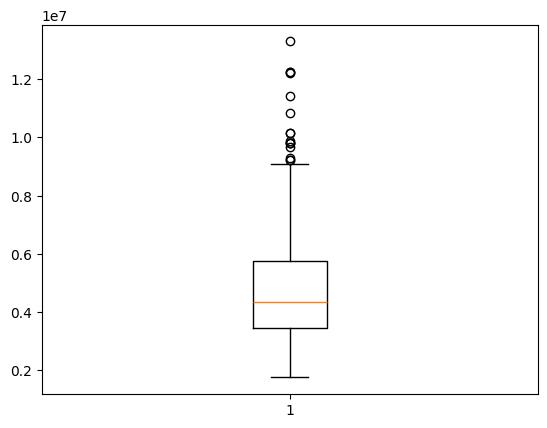

<Figure size 800x500 with 0 Axes>

In [151]:
plt.boxplot(data['price'])
fig = plt.figure(figsize =(8, 5))
plt.show()

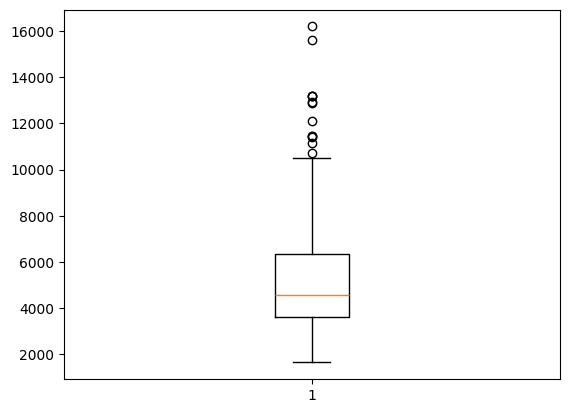

<Figure size 800x500 with 0 Axes>

In [152]:

plt.boxplot(data['area'])
fig = plt.figure(figsize =(8,5))
plt.show()

In [153]:
print(data['price'].skew())# niveau de desequilibre des données
print(data['area'].skew())

1.2143782923431483
1.3498355351465485


***Replace outliers***

In [154]:
def HandOutliers(column,dt):
    Price=np.sort(dt[column])
    q1=np.quantile(Price,0.25)
    q3=np.quantile(Price,0.75)
    med=np.median(Price)
    iqr=q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers=(dt[column]>upper_bound) | (dt[column]<lower_bound )  # valeurs abberantes identifiées
    dt.loc[outliers,column]=med #remplacer par la mediane
    return dt

In [155]:
data=HandOutliers('price',data)
data=HandOutliers('area',data)


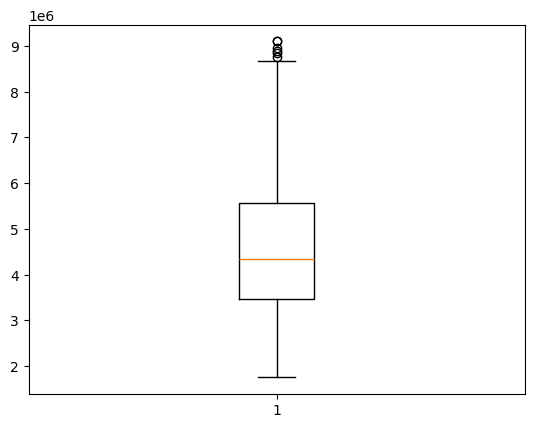

<Figure size 1000x700 with 0 Axes>

In [156]:
plt.boxplot(data['price'])
fig = plt.figure(figsize =(10, 7))
plt.show()

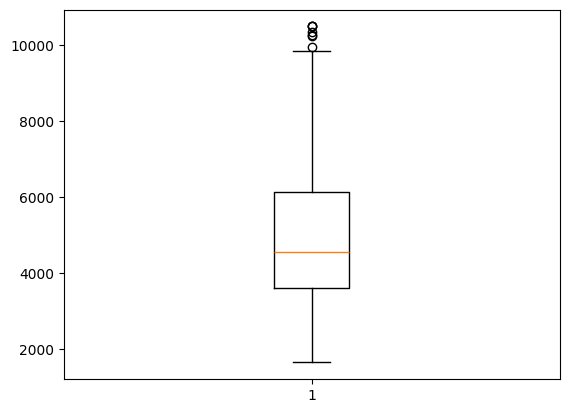

<Figure size 1000x700 with 0 Axes>

In [157]:
plt.boxplot(data['area'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [158]:
print(data['price'].skew())
print(data['area'].skew())
# on remarque moins de desequilibre

0.7228621938439534
0.7115477798296053


## **3. Data Transformation** 


***Normalization***

In [159]:
data['area']=(data['area']-data['area'].min())/(data['area'].max()-data['area'].min())# rendre les valeurs entre 0 et 1
print(data['area'].max())
print(data['area'].min())

1.0
0.0


***Standardization***

In [160]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'FUrnished', 'unfurnished'],
      dtype=object)

In [161]:
data.loc[(data['furnishingstatus']=='FUrnished'),'furnishingstatus']='furnished' # rectifie l'ecriture de Furnished
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

***Transoformations***

In [162]:
data['furnishingstatus'] = pd.factorize(data['furnishingstatus'])[0] # codifie avec des chiffres
data['furnishingstatus'].unique()

array([0, 1, 2])

In [163]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4340000.0,0.651977,4,2,3,yes,no,no,no,yes,2,yes,0
1,4340000.0,0.825989,4,4,4,yes,no,no,no,yes,3,no,1
2,4340000.0,0.938983,3,2,2,yes,no,yes,no,no,2,yes,1
3,4340000.0,0.661017,4,2,2,yes,no,yes,no,yes,3,yes,0
4,4340000.0,0.651977,4,1,2,yes,yes,yes,no,yes,2,no,0
